In [3]:
# Loading the data
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep = ";")

In [4]:
# examining the data
# checking data samples
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# features
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Features list: ", feature_list)
print("Label: ", label)

Features list:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label:  ['quality']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

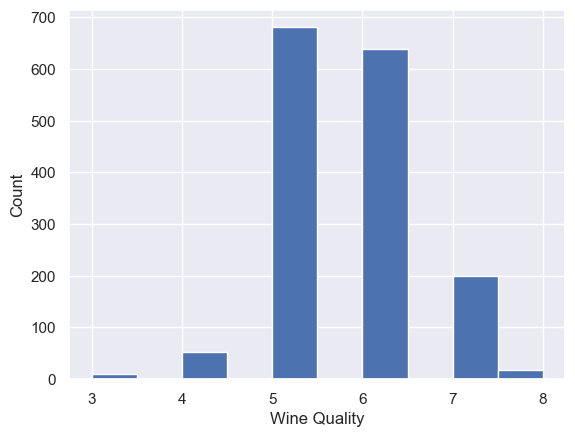

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

<Axes: >

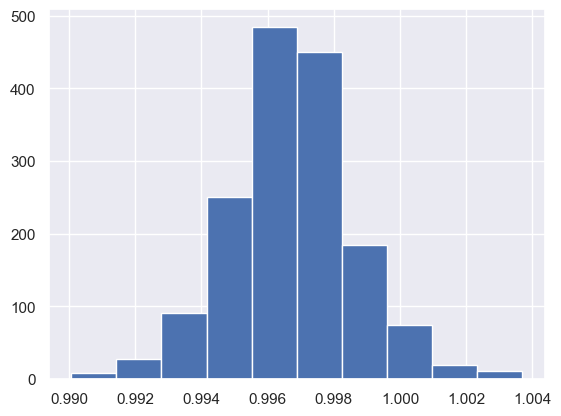

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
data.density.hist()

In [14]:
# creating a test set
# the below function is used to split the data into training and test.
# Make sure to seed so that we get the same test set int the next run.
import numpy as np
def split_train_test(data,test_ratio):
    # set the random seed.
    np.random.seed(42)
    # shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    # calculate the size of the test set.
    test_set_size = int(len(data)*test_ratio)
    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# sklearn provides a few functions for creating test sets based on
# 1. Random Sampling , 2. Stratified Sampling
# 1. Random sampling, which randomly selects k% points in the test set
# 2.Stratified Sampling, which samples test examples such that they are representative of overall distribution
# train_test_split function performs random sampling with
#   .random_state parameter to set the random seed, which ensures that the same exaamples are seected for test sets across runs.
#   .test_size parameter for specifying size of test set
#   .shuffle flag to specify if the data needs to be shuffled before splitting.
# provision for processing multiple datasets with an identical number of rows and
# selecting the same indices from these datasets.
# useful when labeling are in different datasets.
from sklearn.model_selection import train_test_split
? train_test_split

Signature:
 train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

tra

In [17]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(train_set)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
493             8.7             0.690         0.31             3.0      0.086  \
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  

<Axes: >

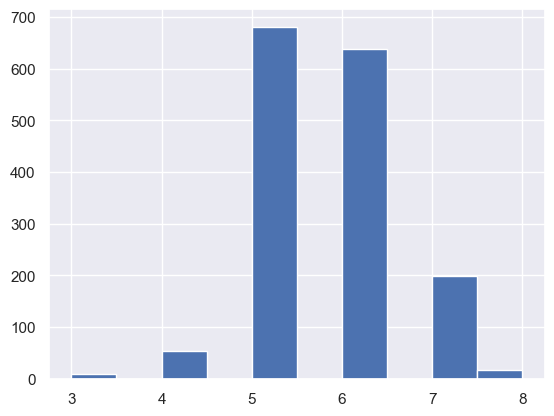

In [ ]:
# 2.Stratified Sampling
# Data distribution may not be uniform in real world data.TRandom sampling by its nature introduces bias in such data sets
# the label distribution in our dataset was also not uniform
sns.set_theme()
data.quality.hist()
# label 5 and 6 are over represented in the dataset whereas other labels are underrepresented in the dataset.

In [21]:
# we divide th epopulation into homogenous groups called strata.
# Data is sampled from stratum so as to match it with the overall data distribution
# Scikit-learn provides a class StratifiedShuffleSplit that helps us in stratified sampling.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["quality"]):
    start_train_set =  data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [23]:
# lets examine the test set distribution by the wine quality
# that was used for stratified sampling.
strat_dist = strat_test_set["quality"].value_counts()/len(strat_test_set)
strat_dist

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: count, dtype: float64

In [24]:
# let's now compare it with the overall distribution.
overall_dist = data["quality"].value_counts()/len(data)
overall_dist

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64